Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [81]:
!pip install pymystem3

In [82]:
import re

In [83]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [84]:
from nltk.tokenize import word_tokenize

In [85]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [86]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [87]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

In [88]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [89]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [90]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [91]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [92]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [93]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [94]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [95]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [96]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [97]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [98]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [99]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [100]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [101]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [102]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [103]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [104]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [105]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [106]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [107]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [108]:
import nltk
nltk.download('averaged_perceptron_tagger_rus')
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

[nltk_data] Downloading package averaged_perceptron_tagger_rus to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_rus is already up-to-
[nltk_data]       date!


[('И', 'CONJ'),
 ('пунша', 'S'),
 ('пламень', 'S'),
 ('голубой', 'A=m'),
 ('.', 'NONLEX'),
 ('Люблю', 'V'),
 ('воинственную', 'A=f'),
 ('живость', 'S'),
 ('Потешных', 'A=pl'),
 ('Марсовых', 'A=pl'),
 ('полей', 'S'),
 (',', 'NONLEX'),
 ('Пехотных', 'A=pl'),
 ('ратей', 'S'),
 ('и', 'CONJ'),
 ('коней', 'A=f'),
 ('Однообразную', 'A=f'),
 ('красивость', 'S'),
 (',', 'NONLEX'),
 ('В', 'PR'),
 ('их', 'A-PRO'),
 ('стройно', 'ADV'),
 ('зыблемом', 'V'),
 ('строю', 'S'),
 ('Лоскутья', 'S'),
 ('сих', 'A-PRO=pl'),
 ('знамён', 'S'),
 ('победных', 'A=pl'),
 (',', 'NONLEX'),
 ('Сиянье', 'S'),
 ('шапок', 'S'),
 ('этих', 'A-PRO=pl'),
 ('медных', 'A=pl'),
 (',', 'NONLEX'),
 ('Насквозь', 'ADV'),
 ('простреленных', 'V'),
 ('в', 'PR'),
 ('бою', 'S'),
 ('.', 'NONLEX')]

Можно "подклеить" для удобства тэги к слову.

In [109]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['И_CONJ', 'пунша_S', 'пламень_S', 'голубой_A=m', '._NONLEX', 'Люблю_V', 'воинственную_A=f', 'живость_S', 'Потешных_A=pl', 'Марсовых_A=pl', 'полей_S', ',_NONLEX', 'Пехотных_A=pl', 'ратей_S', 'и_CONJ', 'коней_A=f', 'Однообразную_A=f', 'красивость_S', ',_NONLEX', 'В_PR', 'их_A-PRO', 'стройно_ADV', 'зыблемом_V', 'строю_S', 'Лоскутья_S', 'сих_A-PRO=pl', 'знамён_S', 'победных_A=pl', ',_NONLEX', 'Сиянье_S', 'шапок_S', 'этих_A-PRO=pl', 'медных_A=pl', ',_NONLEX', 'Насквозь_ADV', 'простреленных_V', 'в_PR', 'бою_S', '._NONLEX']


In [110]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

Файл успешно прочитан. Длина текста: 3571 символов
Тип переменной text_string: <class 'str'>


'A Day in the Life of a University Student\nThe shri'

In [111]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

A_DET Day_NOUN in_ADP the_DET Life_NOUN of_ADP a_DET University_NOUN Student_NOUN The_DET shrill_NOUN sound_NOUN of_ADP my_PRON alarm_NOUN pierces_NOUN through_ADP the_DET darkness_NOUN at_ADP 6:30_NUM AM_NOUN ._. I_PRON groan_VERB and_CONJ reach_VERB for_ADP my_PRON phone_NOUN ,_. hitting_VERB snooze_ADJ one_NUM more_ADJ time—a_ADJ daily_ADJ ritual_NOUN that_DET buys_VERB me_PRON those_DET precious_ADJ ten_ADJ minutes_NOUN of_ADP extra_ADJ sleep_NOUN ._. When_ADV I_PRON finally_ADV drag_VERB myself_PRON out_ADP of_ADP bed_NOUN ,_. the_DET small_ADJ dorm_NOUN room_NOUN is_VERB still_ADV dark_ADJ ,_. my_PRON roommate_NOUN 's_PRT gentle_ADJ snoring_VERB a_DET reminder_NOUN that_ADP not_ADV everyone_NOUN has_VERB early_ADJ morning_NOUN lectures_NOUN ._. Morning_NOUN classes_NOUN are_VERB always_ADV a_DET challenge_NOUN ._. I_PRON quickly_ADV shower_VERB ,_. grab_VERB a_DET granola_NOUN bar_NOUN ,_. and_CONJ fill_VERB my_PRON travel_NOUN mug_NOUN with_ADP coffee—the_ADJ lifeblood_NOUN of_A

Сколько у нас частей речи определенного вида?

In [112]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

Your text has 51 adjectives.


In [113]:
from nltk import FreqDist

In [114]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [116]:
stop_words = set(stopwords.words("english"))

In [117]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

<Axes: xlabel='Samples', ylabel='Counts'>

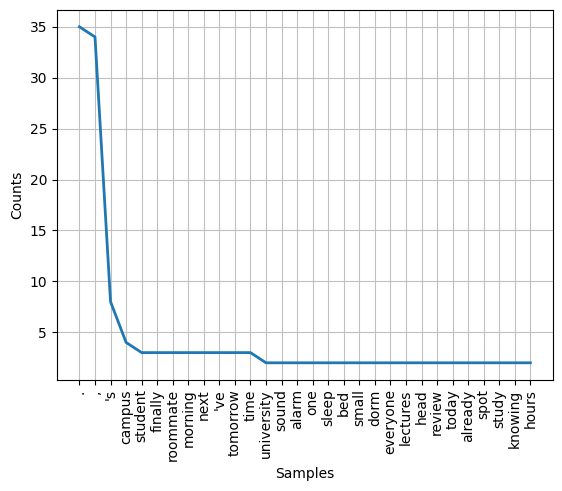

In [118]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [119]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


<Axes: xlabel='Samples', ylabel='Counts'>

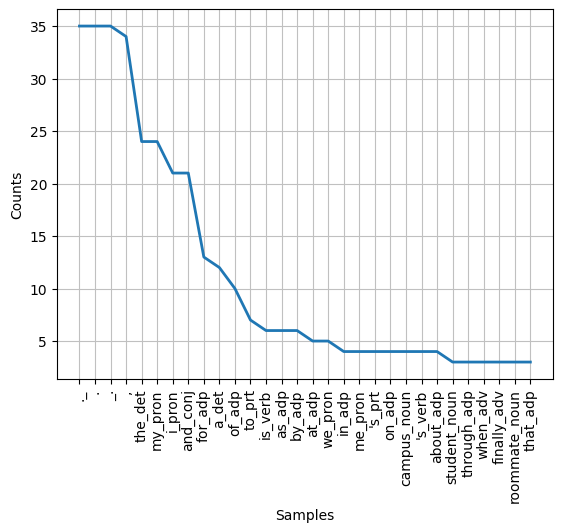

In [120]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib
для англ языка nltk + frequency_distribution.plot., для русского - my stem + библиотека matplotlib

In [128]:
!pip install nltk
!pip install pymystem3

import nltk
import string
import re
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

from pymystem3 import Mystem
from nltk import FreqDist
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Файл успешно прочитан. Длина текста: 6709 символов
Токены: ['machine', 'learning', 'deep', 'learning', 'focuses', 'utilizing', 'multilayered', 'neural', 'networks', 'perform', 'tasks', 'classification', 'regression', 'representation', 'learning', 'field', 'takes', 'inspiration', 'biological', 'neuroscience', 'revolves', 'around', 'stacking', 'artificial', 'neurons', 'layers', 'training', 'process', 'data', 'adjective', 'deep', 'refers', 'use', 'multiple', 'layers', 'ranging', 'three', 'several', 'hundred', 'thousands', 'network', 'methods', 'used', 'supervised', 'semisupervised', 'unsupervised', 'common', 'deep', 'learning', 'network', 'architectures', 'include', 'fully', 'connected', 'networks', 'deep', 'belief', 'networks', 'recurrent', 'neural', 'networks', 'convolutional', 'neural', 'networks', 'generative', 'adversarial', 'networks', 'transformers', 'neural', 'radiance', 'fields', 'architectures', 'applied', 'fields', 'including', 'computer', 'vision', 'speech', 'recognition', 'na

<Axes: xlabel='Samples', ylabel='Counts'>

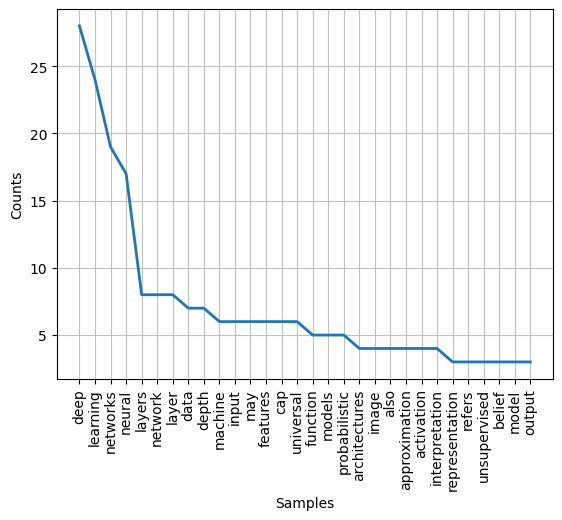

In [122]:
#1 способ (просто токены) для английского текста
en_file = "english_text.txt"

with open(en_file) as file:
    english_text = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(english_text)} символов")

punctuation = string.punctuation
punctuation += '–-«»№'
translator = str.maketrans('', '', punctuation)
english_text = english_text.translate(translator)
english_text = re.sub(r'\d+', ' ', english_text)

english_text = word_tokenize(english_text)
english_stopwords = set(stopwords.words('english'))

filtered_eng_list = [word for word in english_text if word.casefold() not in english_stopwords]
new_text = ' '.join(filtered_eng_list)
tokenized_english_text = word_tokenize(new_text.lower())

print(f"Токены: {tokenized_english_text}")
frequency_distribution_1 = FreqDist(tokenized_english_text)
frequency_distribution_1.plot(30, cumulative=False)

Файл успешно прочитан. Длина текста: 5744 символов
Токены: ['утро', 'понедельник', 'декабря', 'выдалось', 'ужасным', 'жителей', 'почтового', 'переулка', 'начавшийся', 'примерно', 'утра', 'пожар', 'уничтожил', 'внутренние', 'помещения', 'двух', 'старинных', 'домах', 'доме', 'смитов', 'почтовый', 'переулок', 'доме', 'почтового', 'ведомства', 'почтовый', 'переулок', 'б', 'оба', 'здания', 'жилые', 'суммарно', 'пять', 'квартир', 'дома', 'являются', 'объектами', 'культурного', 'наследия', 'предварительной', 'информации', 'пострадавших', 'мэрия', 'подготовила', 'пункт', 'временного', 'размещения', 'манёвренный', 'фонд', 'погорельцев', 'тушение', 'пожара', 'непростым', 'районе', 'нашлось', 'работающих', 'пожарных', 'гидрантов', 'огнеборцам', 'пришлось', 'тянуть', 'рукава', 'метров', 'перекрывать', 'две', 'дороги', 'петра', 'великого', 'уборевича', 'словам', 'местных', 'жителей', 'пожар', 'начался', 'доме', 'смитов', 'пылал', 'весь', 'верхний', 'деревянный', 'этаж', 'крыша', 'далее', 'огонь', '

<Axes: xlabel='Samples', ylabel='Counts'>

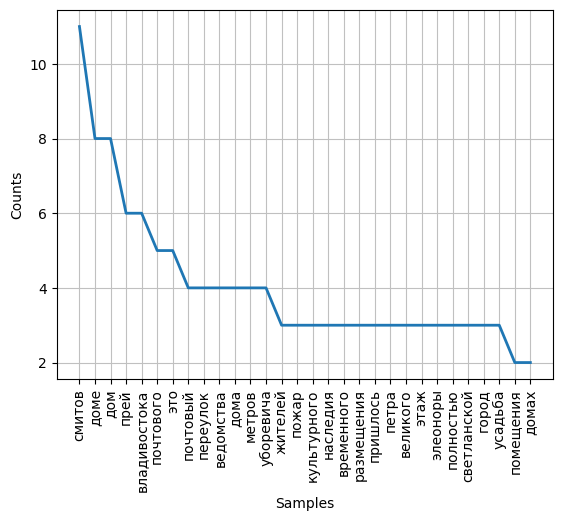

In [123]:
#1 способ (просто токены) для русского текста
ru_file = "russian_text.txt"

with open(ru_file) as file:
    russian_text = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(russian_text)} символов")

punctuation = string.punctuation
punctuation += '–-«»№'
translator = str.maketrans('', '', punctuation)
russian_text = russian_text.translate(translator)
russian_text = re.sub(r'\d+', ' ', russian_text)

russian_text = word_tokenize(russian_text)
russian_stopwords = set(stopwords.words('russian'))

filtered_rus_list = [word for word in russian_text if word.casefold() not in russian_stopwords]
new_text = ' '.join(filtered_rus_list)
tokenized_russian_text = word_tokenize(new_text.lower())

print(f"Токены: {tokenized_russian_text}")
frequency_distribution_1 = FreqDist(tokenized_russian_text)
frequency_distribution_1.plot(30, cumulative=False)

Части речи: ['machine_NN', 'learning_VBG', 'deep_JJ', 'learning_NN', 'focuses_VBZ', 'utilizing_JJ', 'multilayered_JJ', 'neural_JJ', 'networks_NNS', 'perform_VBP', 'tasks_NNS', 'classification_NN', 'regression_NN', 'representation_NN', 'learning_VBG', 'field_NN', 'takes_VBZ', 'inspiration_JJ', 'biological_JJ', 'neuroscience_NN', 'revolves_NNS', 'around_IN', 'stacking_VBG', 'artificial_JJ', 'neurons_NNS', 'layers_NNS', 'training_VBG', 'process_NN', 'data_NNS', 'adjective_JJ', 'deep_JJ', 'refers_NNS', 'use_VBP', 'multiple_JJ', 'layers_NNS', 'ranging_VBG', 'three_CD', 'several_JJ', 'hundred_CD', 'thousands_NNS', 'network_NN', 'methods_NNS', 'used_VBN', 'supervised_VBD', 'semisupervised_JJ', 'unsupervised_JJ', 'common_JJ', 'deep_NN', 'learning_NN', 'network_NN', 'architectures_NNS', 'include_VBP', 'fully_RB', 'connected_VBN', 'networks_NNS', 'deep_JJ', 'belief_NN', 'networks_NNS', 'recurrent_JJ', 'neural_JJ', 'networks_NNS', 'convolutional_JJ', 'neural_JJ', 'networks_NNS', 'generative_VBP',

<Axes: xlabel='Samples', ylabel='Counts'>

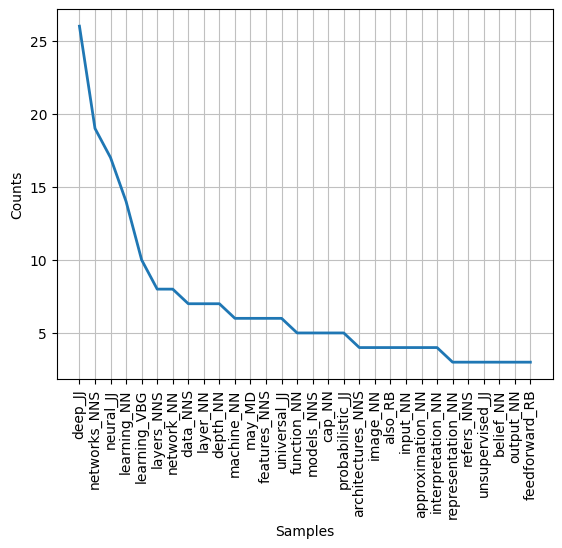

In [124]:
#2 способ (частеречная разметка) для английского текста

tagged_eng = nltk.pos_tag(tokenized_english_text)

list_eng_tagged = []
for elem in tagged_eng:
    tag_tog = '_'.join(elem)
    list_eng_tagged.append(tag_tog)
print(f"Части речи: {list_eng_tagged}")
frequency_distribution_2 = FreqDist(list_eng_tagged)
frequency_distribution_2.plot(30, cumulative=False)

Части речи: ['утро_S', 'понедельник_S', 'декабря_S', 'выдалось_V', 'ужасным_A', 'жителей_S', 'почтового_A', 'переулка_S', 'начавшийся_V', 'примерно_ADV', 'утра_S', 'пожар_S', 'уничтожил_V', 'внутренние_A', 'помещения_S', 'двух_NUM', 'старинных_A', 'домах_S', 'доме_S', 'смитов_S', 'почтовый_A', 'переулок_S', 'доме_S', 'почтового_A', 'ведомства_S', 'почтовый_A', 'переулок_S', 'б_PART', 'оба_NUM', 'здания_S', 'жилые_A', 'суммарно_A', 'пять_NUM', 'квартир_S', 'дома_S', 'являются_V', 'объектами_S', 'культурного_A', 'наследия_S', 'предварительной_A', 'информации_S', 'пострадавших_S', 'мэрия_S', 'подготовила_V', 'пункт_S', 'временного_A', 'размещения_S', 'манёвренный_A', 'фонд_S', 'погорельцев_S', 'тушение_S', 'пожара_S', 'непростым_A', 'районе_S', 'нашлось_V', 'работающих_V', 'пожарных_S', 'гидрантов_S', 'огнеборцам_S', 'пришлось_V', 'тянуть_V', 'рукава_S', 'метров_S', 'перекрывать_V', 'две_NUM', 'дороги_S', 'петра_S', 'великого_A', 'уборевича_S', 'словам_S', 'местных_A', 'жителей_S', 'пожар

<Axes: xlabel='Samples', ylabel='Counts'>

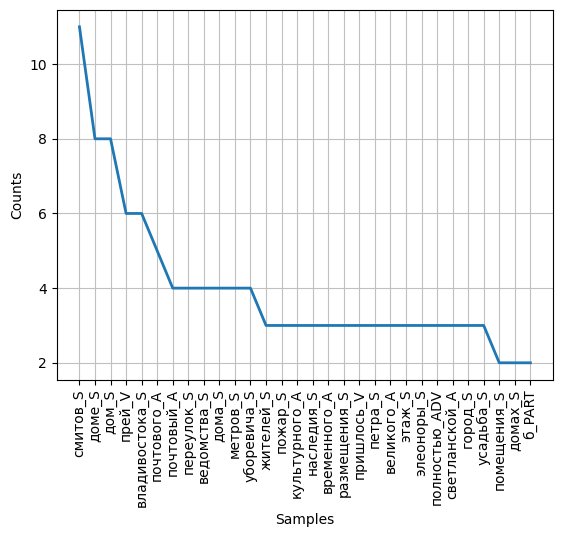

In [125]:
#2 способ (частеречная разметка) для русского текста

mystem = Mystem()

russian_text = ' '.join(tokenized_russian_text)
text_analyzed = mystem.analyze(russian_text)

def process_mystem_analysis(analysis_results):
    result_tokens = []

    for item in analysis_results:
            if item.get('text', '').strip() == '' or 'analysis' not in item:
                continue

            token_text = item['text'].lower()

            if 'analysis' in item and item['analysis']:
                first_analysis = item['analysis'][0]

                if 'gr' in first_analysis:
                    pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                    formatted_token = f"{token_text}_{pos_tag}"
                    result_tokens.append(formatted_token)
                else:
                    result_tokens.append(token_text)
            else:
                result_tokens.append(token_text)

    return result_tokens

tagged_tokens = process_mystem_analysis(text_analyzed)


print(f"Части речи: {tagged_tokens}")
frequency_distribution_2 = FreqDist(tagged_tokens)
frequency_distribution_2.plot(30, cumulative=False)


Лемматизированные слова: ['machine', 'learn', 'deep', 'learning', 'focus', 'utilizing', 'multilayered', 'neural', 'network', 'perform', 'task', 'classification', 'regression', 'representation', 'learn', 'field', 'take', 'inspiration', 'biological', 'neuroscience', 'revolves', 'around', 'stack', 'artificial', 'neuron', 'layer', 'train', 'process', 'data', 'adjective', 'deep', 'refers', 'use', 'multiple', 'layer', 'range', 'three', 'several', 'hundred', 'thousand', 'network', 'method', 'use', 'supervise', 'semisupervised', 'unsupervised', 'common', 'deep', 'learning', 'network', 'architecture', 'include', 'fully', 'connect', 'network', 'deep', 'belief', 'network', 'recurrent', 'neural', 'network', 'convolutional', 'neural', 'network', 'generative', 'adversarial', 'network', 'transformer', 'neural', 'radiance', 'field', 'architecture', 'apply', 'field', 'include', 'computer', 'vision', 'speech', 'recognition', 'natural', 'language', 'processing', 'machine', 'translation', 'bioinformatics'

<Axes: xlabel='Samples', ylabel='Counts'>

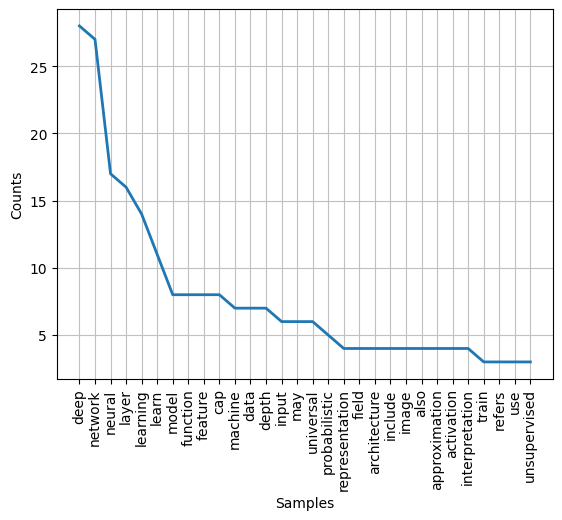

In [126]:
#3 способ (лемматизация) для английского текста
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

list_eng_tagged = nltk.pos_tag(tokenized_english_text)

lemmatized_eng = []
for word, tag in list_eng_tagged:
    wntag = get_wordnet_pos(tag)
    lemmatized_eng.append(lemmatizer.lemmatize(word, pos=wntag))

print(f"Лемматизированные слова: {lemmatized_eng}")
frequency_distribution_3_eng = FreqDist(lemmatized_eng)
frequency_distribution_3_eng.plot(30, cumulative=False)

Лемматизированные слова: ['утро', 'понедельник', 'декабрь', 'выдаваться', 'ужасный', 'житель', 'почтовый', 'переулок', 'начинаться', 'примерно', 'утро', 'пожар', 'уничтожать', 'внутренний', 'помещение', 'два', 'старинный', 'дом', 'дом', 'смит', 'почтовый', 'переулок', 'дом', 'почтовый', 'ведомство', 'почтовый', 'переулок', 'б', 'оба', 'здание', 'жилой', 'суммарный', 'пять', 'квартира', 'дом', 'являться', 'объект', 'культурный', 'наследие', 'предварительный', 'информация', 'пострадавший', 'мэрия', 'подготовить', 'пункт', 'временный', 'размещение', 'маневренный', 'фонд', 'погорелец', 'тушение', 'пожар', 'непростой', 'район', 'находиться', 'работать', 'пожарный', 'гидрант', 'огнеборец', 'приходиться', 'тянуть', 'рукав', 'метр', 'перекрывать', 'два', 'дорога', 'петр', 'великий', 'уборевич', 'слово', 'местный', 'житель', 'пожар', 'начинаться', 'дом', 'смит', 'пылать', 'весь', 'верхний', 'деревянный', 'этаж', 'крыша', 'далее', 'огонь', 'переходить', 'пристройка', 'тот', 'адрес', 'затем', 'пе

<Axes: xlabel='Samples', ylabel='Counts'>

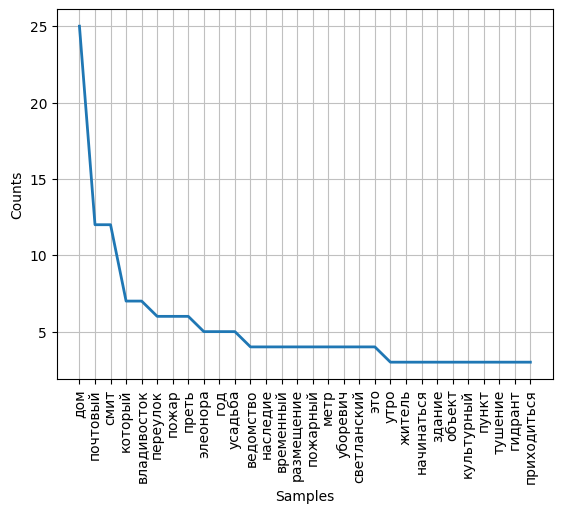

In [127]:
#3 способ (лемматизация) для русского текста
lemmas = mystem.lemmatize(russian_text)
text_lemmatized = [lemma for lemma in lemmas if not lemma.isspace()]

print(f"Лемматизированные слова: {text_lemmatized}")
frequency_distribution_3 = FreqDist(text_lemmatized)
frequency_distribution_3.plot(30, cumulative=False)